In [14]:
from subprocess import Popen, PIPE

def run_ampl(filepath: str) -> str:
    command = ["ampl", filepath]

    process = Popen(command, stdout=PIPE, cwd="..", text=True, encoding="UTF-8")
    (out_text, _) = process.communicate()
    exit_code = process.wait()

    if exit_code != 0:
        raise Exception(f"command '{' '.join(command)}' exited with code: {exit_code}")

    return out_text

In [15]:
z2_a_out_text = run_ampl("./src/z2-a.run")
print(z2_a_out_text)

:    out_risk  out_profit_average    :=
0     0              -300
1     0.999897        529.309
2     1.99983        1208.64
3     2.99976        1887.97
4     3.99969        2567.31
5     4.99963        3246.64
6     5.99956        3925.97
7     6.99949        4605.31
8     7.99942        5284.64
9     8.99935        5963.97
10    9.99929        6575.02
11   10.9992         7029.73
12   11.9992         7416.33
13   12.9992         7737.7
14   13.9991         8030.22
15   14.9991         8322.75
16   15.9991         8614.48
17   16.9991         8901.65
18   17.999          9188.82
19   18.999          9476
20   19.999          9763.17
21   20.9989        10050.3
22   21.9989        10337.5
23   22.9989        10624.7
24   23.9989        10911.9
25   24.9988        11163.9
26   25.9988        11408.2
27   26.9988        11652.5
28   27.9988        11896.8
29   28.9987        12141.1
30   29.9987        12385.4
31   30.9987        12619.8
32   31.9987        12822.9
33   32.9986        1

In [16]:
from ampl import parse_ampl_table
from io import StringIO

z2_a_out = StringIO(z2_a_out_text)
z2_a_df = parse_ampl_table(z2_a_out)
z2_a_df.head()

,out_risk,out_profit_average
0,0.0,-300.0
1,0.999897,529.309
2,1.99983,1208.64
3,2.99976,1887.97
4,3.99969,2567.31


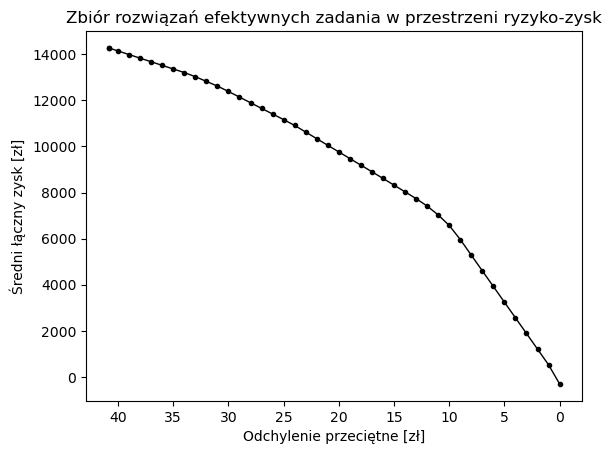

In [17]:
import numpy as np
from matplotlib import pyplot as plt


ax = plt.subplot(1, 1, 1)
ax.plot(z2_a_df["out_risk"], z2_a_df["out_profit_average"], "ko-", linewidth=1, markersize=3)
ax.invert_xaxis()
plt.title("Zbiór rozwiązań efektywnych zadania w przestrzeni ryzyko-zysk")
plt.xlabel("Odchylenie przeciętne [zł]")
plt.ylabel("Średni łączny zysk [zł]")
plt.show()

In [18]:
z2_c_out_text = run_ampl("./src/z2-c.run")
print(z2_c_out_text)

set in_a_risk := 5 20 37;

:    profit  abs(risk[s])    :=
1    3476.43   11.4893
2    3227.08    0.978096
3    3048.99    9.88253
4    3260.89    0.712339
5    3246.64    0
6    3123.06    6.17904
7    3150.97    4.78333
8    3418.71    8.60345
9    3178.54    3.40493
10   3079.5     8.35688
11   3216.19    1.52272
12   3249.46    0.140848
13   3106.3     7.01722
14   3346.46    4.99073
15   3186.66    2.99883
16   3246.64    0
17   3246.64    0
18   3302.42    2.78914
19   3672.05   21.2705
20   3149.19    4.87269
;

:     profit  abs(risk[s])    :=
1    10478.3     35.7558
2     9998.56    11.7692
3     9215.84    27.3665
4     9630.06     6.6558
5    10000.2     11.8497
6     9091.35    33.5912
7     9189.21    28.6983
8    10202.5     21.9683
9     9011.06    37.6056
10    9488.89    13.714
11    9815.68     2.62519
12   10154.5     19.5682
13    9534.86    11.4154
14   10216.7     22.6781
15    9763.17     0
16    9417.81    17.2682
17    9763.17     0
18    9567.61     9.77827
1

In [19]:
from ampl import parse_ampl_set, parse_ampl_table

z2_c_out = StringIO(z2_c_out_text)
z2_c_risks_max = parse_ampl_set(z2_c_out)
display(z2_c_risks_max)

z2_c_dfs = [parse_ampl_table(z2_c_out, names={1: "risk"}) for _ in z2_c_risks_max]
display(z2_c_dfs[0].head())

0     5
1    20
2    37
Name: in_a_risk, dtype: int64

,profit,risk
1,3476.43,11.4893
2,3227.08,0.978096
3,3048.99,9.88253
4,3260.89,0.712339
5,3246.64,0.0


In [22]:
import pandas as pd

data = np.array([df["profit"] for df in z2_c_dfs])
data = np.sort(data, 1)
n_scenarios = data.shape[1]
headers = [f"{(i+1)/n_scenarios:.2f}" for i in range(n_scenarios)]
index = pd.Index(z2_c_risks_max, name="a_risk")
profits_sorted = pd.DataFrame(data, columns=headers, index=index)
profits_sorted


,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00
a_risk,,,,,,,,,,,,,,,,,,,,
5,3048.99,3079.5,3106.3,3123.06,3149.19,3150.97,3178.54,3186.66,3216.19,3227.08,3246.64,3246.64,3246.64,3249.46,3260.89,3302.42,3346.46,3418.71,3476.43,3672.05
20,9011.06,9091.35,9189.21,9215.84,9417.81,9485.24,9488.89,9534.86,9567.61,9630.06,9763.17,9763.17,9815.68,9998.56,10000.2,10154.5,10202.5,10216.7,10478.3,11238.7
37,12380.7,12410.4,12738.9,12798.2,12830.0,12918.7,12987.5,13348.3,13498.7,13519.5,13583.5,13894.9,14056.6,14104.0,14105.4,14255.3,14461.2,14669.8,14718.2,16200.5


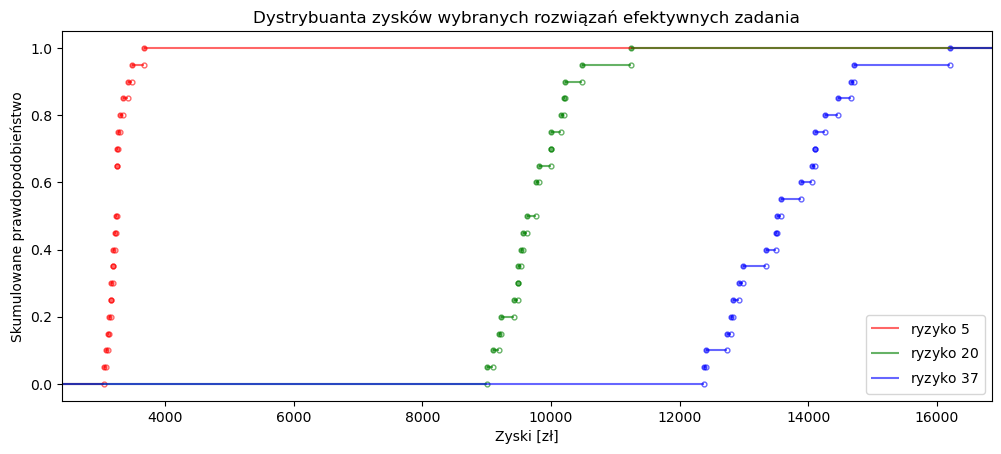

In [23]:
profit_max = profits_sorted.values[:, -1].max()
profit_min = profits_sorted.values[:, 0].min()
margin = (profit_max - profit_min) * 0.05
plt.figure(figsize=(12, 4.8))

for (risk, row), color in zip(profits_sorted.iterrows(), "rgb"):
    # lines
    xs = np.array([profit_min - margin, *row.values, profit_max + margin])
    ys = np.array(range(n_scenarios + 1)) / n_scenarios
    plt.hlines(ys, xs[:-1], xs[1:], color, label=f"ryzyko ${risk}$", alpha=0.6)

    # start points
    filter = [True] + [x1 != x2 for x1, x2 in zip(xs[1:-2], xs[2:-1])]
    style={"s": 12, "facecolors":"white", "edgecolors": color, "alpha": 0.6}
    plt.scatter(xs[1:-1][filter], ys[:-1][filter], **style)

    # end points
    filter = [x1 != x2 for x1, x2 in zip(xs[1:-2], xs[2:-1])] + [True]
    style={"s": 12, "c": color, "alpha": 0.6}
    plt.scatter(xs[1:-1][filter], ys[1:][filter], **style)

plt.title("Dystrybuanta zysków wybranych rozwiązań efektywnych zadania")
plt.xlabel("Zyski [zł]")
plt.ylabel("Skumulowane prawdopodobieństwo")
plt.legend(loc="lower right")
plt.xlim((profit_min - margin, profit_max + margin))
plt.show()